In [3]:
import numpy as np
from pyorbit.subroutines import kepler_exo
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib notebook

import matplotlib.pyplot as plt
import collections
import matplotlib.gridspec as gridspec # GRIDSPEC !
import collections
import matplotlib


In [4]:
def plots_in_grid():
    # Partially taken from here:
    # http://www.sc.eso.org/~bdias/pycoffee/codes/20160407/gridspec_demo.html
    
    gs = gridspec.GridSpec(2,1, height_ratios=[3.0,1.0])
    # Also make sure the margins and spacing are apropriate
    gs.update(left=0.2, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)
    
    ax_0 = plt.subplot(gs[0])
    ax_1 = plt.subplot(gs[1])

    # Adding minor ticks only to x axis
    from matplotlib.ticker import AutoMinorLocator
    minorLocator = AutoMinorLocator()
    ax_0.xaxis.set_minor_locator(minorLocator)
    ax_1.xaxis.set_minor_locator(minorLocator)

    # Disabling the offset on top of the plot
    ax_0.ticklabel_format(useOffset=False, style='plain')
    ax_1.ticklabel_format(useOffset=False, style='plain')
    return ax_0, ax_1

In [48]:
# Path to the configuration file, It can be absolute or relative with respect to this jupyter notebook
path_to_configuration_file = './'    

 # Change according to the name of the configuration file
configuration_name = 'YO50_onlyRVs_mod012_GPtrained_BIS_Ca_2p'

# Sampler used in the analysis
sampler = 'emcee'

# Set of parameters extracted from the posteriors
# it can be 'model_files', 'MAP_model_files', 'sampleMED_model_files'
solution_set = 'model_files' 

# First part of the output file name
output_name = 'YO50_onlyRVs_mod012' 

# List the RV datasets as they appear in the configuration file (e.g., RV_data)
# and the name you want to use in the label (e.g., HARPS-N)
rv_datasets_dictionary = {
    'RV_data': 'HARPS-N'
}

# List any model other than radial_velocites used to model the dataset
# Leave it like in the commented example below if there ar eno additional models
#rv_additional_models = ['']
rv_additional_models = ['gp_quasiperiodic']

# The script will generate a plot for each planet in planet_dictionary
planet_dictionary = collections.OrderedDict()

# Name the planet in the same way as in the configuration file 
# - Period and Tc (fitted or derived) must be taken form the output of pyorbit_results
# - limits_folded_x  will define the horizontal range of the plot, in orbital phase 
# - limits_folded_y  will define the vertical range of the plot showing the radial velocities 
#   of the planet (i.e., observations minus any other model) and the model
# - limits_residuals_y will define the vertical range of the residuals plot 
# - transit_folded: if True, RVs are folded according to the provided time of conjuction Tc (orbital phase=0)
#   if False, RVs are folded starting from the reference time provided in the configuration file

planet_dictionary['b'] =  {
    'Period': 3.54215,   # Orbital period of the planet 
    'Tc': 2459474.8568, # Central time of transit (fitted or derived)
    'limits_folded_x': [-0.75, 0.75],
    'limits_folded_y': [-10.8, 10.8],
    'limits_residuals_y': [-9.5, 9.5],
    'transit_folded': True
}

planet_dictionary['c'] =  {
    'Period': 178.98,
    'Tc': 2458823.9,
    'limits_folded_x': [-0.25, 1.25],
    'limits_folded_y': [-500.8, 500.8],
    'limits_residuals_y': [-9.5, 9.5],
    'transit_folded': False
}

# general_dictionary provides the values for the unfolded RV plot 
# (all observed RVs after correcting for offsets)
# and other keywords used in the plot 

general_dictionary = {
    'Tref': 2458700.,
    'add_jitter': True,
    'reference_planet': 'b',
    'limits_full_x': [-0.25, 1.25],
    'limits_bjd': [5300, 9900],
    'font_label': 16,
    'dot_size': 18, 
    'figsize': (8,8),
    
    
    #'limits_full_x': [-0.75, 0.75],
    #'limits_full_y': [-69.0, 69.0],
    #'limits_residuals_y': [-5.5, 5.5],
}

if len(rv_datasets_dictionary)==1:
    general_dictionary['planet_color_code'] = True
else:
    general_dictionary['planet_color_code'] = False


<IPython.core.display.Javascript object>


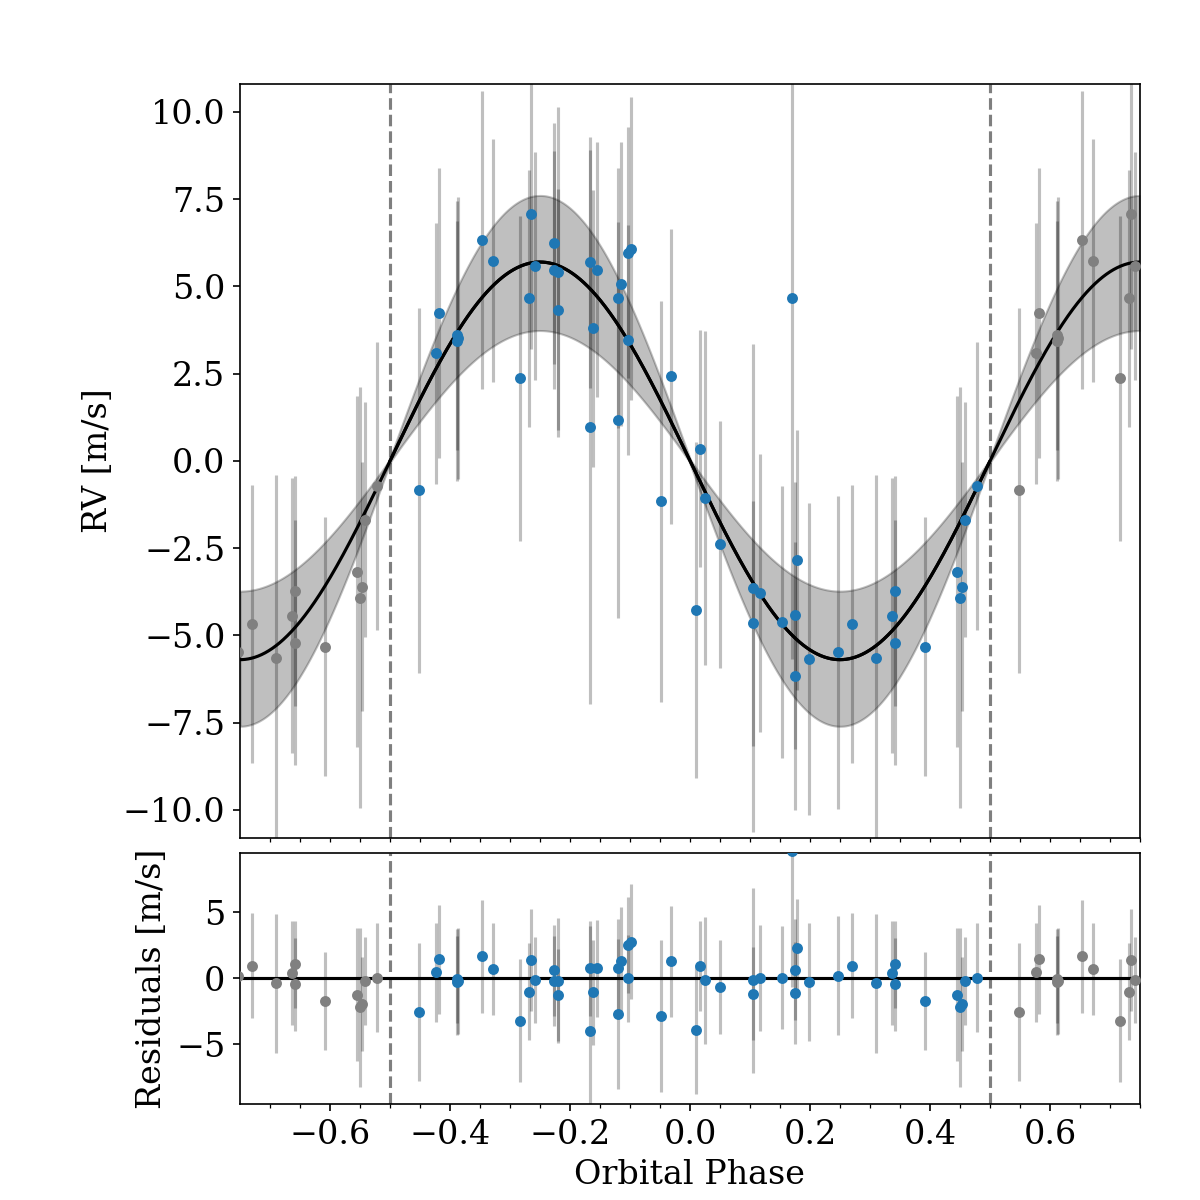

Planet  b , RV curve folded around the transit time
Folded plot for planet  b  saved to: YO50_onlyRVs_mod012_b_folded.png


<IPython.core.display.Javascript object>


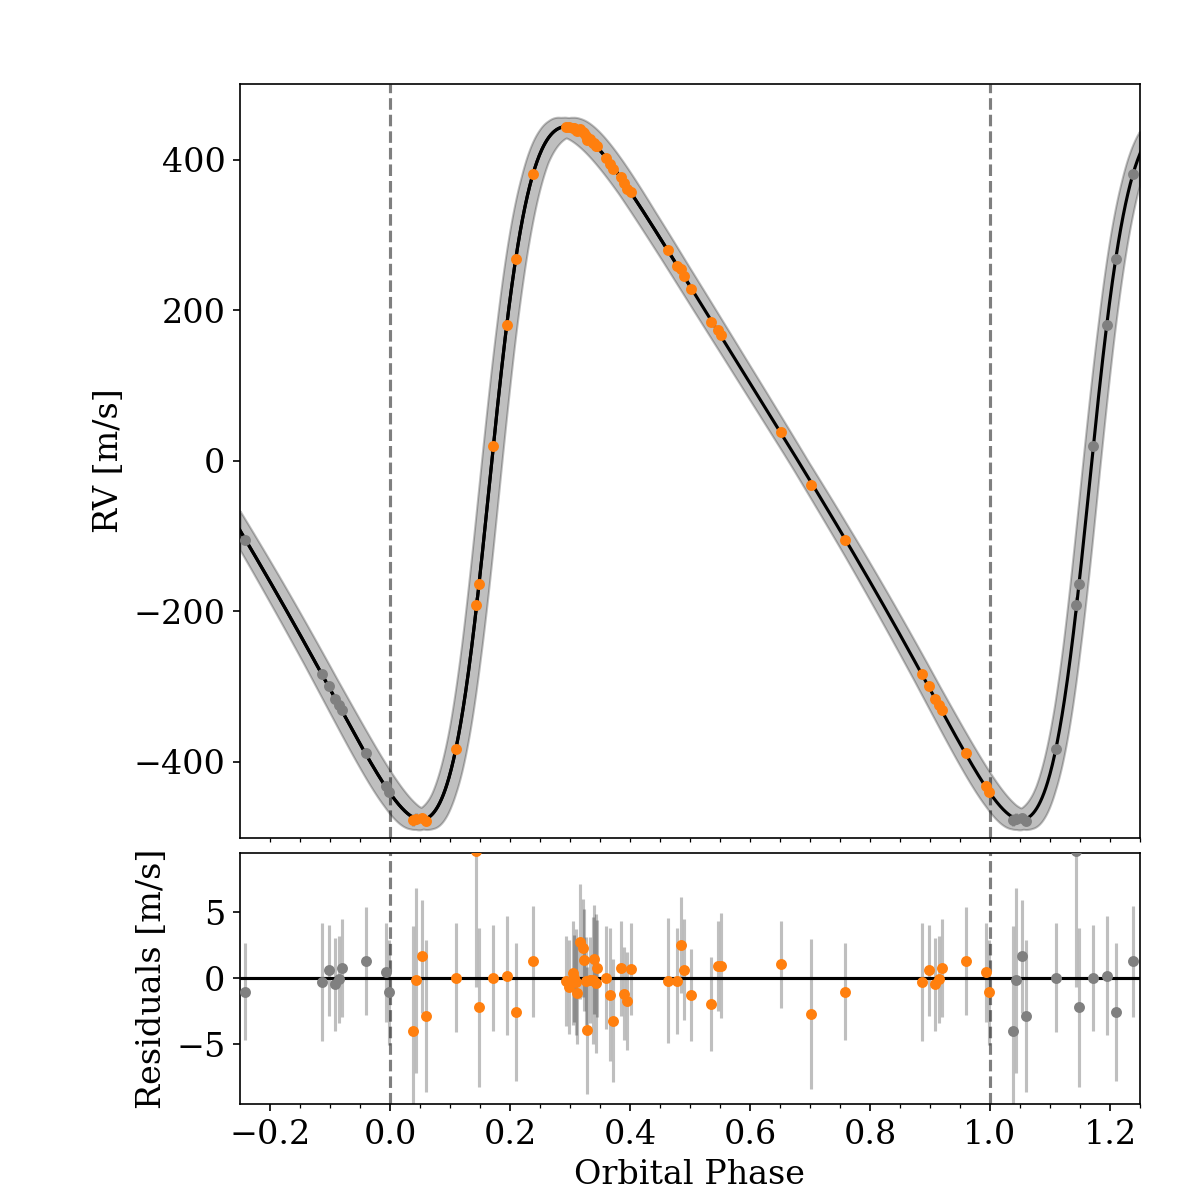

Planet  c , RV curve folded around the reference time
Folded plot for planet  c  saved to: YO50_onlyRVs_mod012_c_folded.png


In [49]:
# Folder RV plot for each of the planet

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams.update({'font.size': general_dictionary['font_label']})

n_color = 0

#set equal to zero if the results have been obtained with Version 10 of PyORBIT
skip_header = 0

dot_size = general_dictionary['dot_size'] 
dir_plot = path_to_configuration_file + '/' + configuration_name + '/' + sampler + '_plot/'+solution_set+'/'
dir_planet_samples = path_to_configuration_file + '/' + configuration_name + '/' + sampler + '_plot/planet_samples/'
dir_all_samples = path_to_configuration_file + '/' + configuration_name + '/' + sampler + '_plot/all_samples/'


for key_name, key_val in planet_dictionary.items():

    fig = plt.figure(figsize=general_dictionary['figsize'])
    ax_0, ax_1 = plots_in_grid()
    
    
    log_likelihood = np.genfromtxt(dir_all_samples + 'log_likelihood.dat')

    n_sam = len(log_likelihood)
    model_samples = np.zeros([n_sam, 5])
    model_samples[:,0] = np.genfromtxt(dir_planet_samples + key_name + '_mean_long.dat')
    model_samples[:,1] = np.genfromtxt(dir_planet_samples + key_name + '_P.dat')
    model_samples[:,2] = np.genfromtxt(dir_planet_samples + key_name + '_K.dat')
    model_samples[:,3] = np.genfromtxt(dir_planet_samples + key_name + '_e.dat')
    model_samples[:,4] = np.genfromtxt(dir_planet_samples + key_name + '_omega.dat')

    sel = (model_samples[:,4]<0.)
    model_samples[sel,4] += 360.
    
    model_perc = np.percentile(model_samples, [15.865, 50, 84.135], axis=0)
    model_logl = np.percentile(log_likelihood, [15.865, 50, 84.135], axis=0)

    selection = (log_likelihood > model_logl[0])
    for ii in range(0,5):
        if model_perc[0,ii]==model_perc[2,ii]: continue
        selection = selection & (model_samples[:,ii]>model_perc[0,ii]) & (model_samples[:,ii]<model_perc[2,ii])

    selected_n = np.sum(selection)

    model_selected = model_samples[selection,:]


    model_phase= np.arange(key_val['limits_folded_x'][0], 
                           key_val['limits_folded_x'][1], 0.001)
    
    if key_val.get('transit_folded',True):
        model_BJD0 = model_phase  *  key_val['Period'] +  (key_val['Tc'] -general_dictionary['Tref'])
    else:
        model_BJD0 = model_phase  *  key_val['Period'] 

    model_rv_min = np.ones_like(model_BJD0) * 1000.
    model_rv_max =  np.ones_like(model_BJD0) * -1000.

    for ii in range(0, selected_n):
        rv = kepler_exo.kepler_RV_T0P(model_BJD0, 
                           model_selected[ii,0], 
                           model_selected[ii,1],
                           model_selected[ii,2],
                           model_selected[ii,3],
                           model_selected[ii,4])
        sel_min = (rv<model_rv_min)
        model_rv_min[sel_min] = rv[sel_min]

        sel_max = (rv>model_rv_max)
        model_rv_max[sel_max] = rv[sel_max]    


    
    
    
    
    ax_0.fill_between(model_phase, model_rv_min, model_rv_max, alpha=0.25, color='k')

        

    
    rv_keplerian = np.genfromtxt(dir_plot + 'RV_planet_'+key_name+'_kep.dat', skip_header=skip_header)

    if key_val.get('transit_folded',True):
        rv_model_folded = np.genfromtxt(dir_plot + 'RV_planet_'+key_name+'_Tcf.dat', skip_header=skip_header)
    else:
        rv_model_folded = np.genfromtxt(dir_plot + 'RV_planet_'+key_name+'_pha.dat', skip_header=skip_header)

    

    
    # Plot of the model
    ax_0.plot(rv_model_folded[:,0]-1,rv_model_folded[:,1], color='k', linestyle='-', zorder=2, label='RV model')
    ax_0.plot(rv_model_folded[:,0]+1,rv_model_folded[:,1], color='k', linestyle='-', zorder=2)

    if general_dictionary['planet_color_code']:
        default_color = 'C' + repr(n_color)
        n_color += 1
    
    for dataset_name, dataset_label in rv_datasets_dictionary.items():
        
        if not general_dictionary['planet_color_code']:
            default_color = 'C' + repr(n_color)
            n_color += 1
   
        rv_planet_data = np.genfromtxt(dir_plot + dataset_name + '_radial_velocities_'+key_name+'.dat', skip_header=1)
    
        rv_val_compare = rv_planet_data[:,8]
        rv_val_compare_err = rv_planet_data[:,9]
        rv_residuals = rv_planet_data[:,10]
        
        if key_val.get('transit_folded',False):
            rv_folded = rv_planet_data[:,1] / key_val['Period']
        else:
            rv_folded = rv_planet_data[:,2]
        
        if general_dictionary['add_jitter']:
            rv_val_compare_err =  np.sqrt(rv_planet_data[:,9]**2 + rv_planet_data[:,12]**2)
            
        
        ax_0.errorbar(rv_folded, rv_val_compare, yerr=rv_val_compare_err, color='black', markersize=0, alpha=0.25, fmt='o', zorder=0)
        ax_0.scatter(rv_folded, rv_val_compare, c=default_color, s=dot_size, zorder=5, alpha=1.0, label=dataset_label)

        # Adding points at phase-1
        ax_0.errorbar(rv_folded-1, rv_val_compare, yerr=rv_val_compare_err, color='black', markersize=0, alpha=0.25, fmt='o', zorder=0)
        ax_0.scatter(rv_folded-1, rv_val_compare, c='gray', s=dot_size, zorder=10, alpha=1.0)

        # Adding points at phase+1
        ax_0.errorbar(rv_folded+1, rv_val_compare, yerr=rv_val_compare_err, color='black', markersize=0, alpha=0.25, fmt='o', zorder=0)
        ax_0.scatter(rv_folded+1, rv_val_compare, c='gray', s=dot_size, zorder=10, alpha=1.0)

        # plot of the residuals
        ax_1.errorbar(rv_folded, rv_residuals, yerr=rv_val_compare_err, color='black', markersize=0, alpha=0.25, fmt='o', zorder=1)
        ax_1.scatter(rv_folded, rv_residuals, c=default_color, s=dot_size, zorder=10, alpha=1.0)

        # Adding points at phase-1
        ax_1.errorbar(rv_folded-1, rv_residuals, yerr=rv_val_compare_err, color='black', markersize=0, alpha=0.25, fmt='o', zorder=1)
        ax_1.scatter(rv_folded-1, rv_residuals, c='gray', s=dot_size, zorder=10, alpha=1.0)

        # Adding points at phase+1
        ax_1.errorbar(rv_folded+1, rv_residuals, yerr=rv_val_compare_err, color='black', markersize=0, alpha=0.25, fmt='o', zorder=1)
        ax_1.scatter(rv_folded+1, rv_residuals, c='gray', s=dot_size, zorder=10, alpha=1.0)

    

    ax_1.axhline(0.000, c='k', zorder=3)
        
    if key_val.get('limits_folded_x', False):
        ax_0.set_xlim(key_val['limits_folded_x'][0], key_val['limits_folded_x'][1])
        ax_1.set_xlim(key_val['limits_folded_x'][0], key_val['limits_folded_x'][1])
    if key_val.get('limits_folded_y', False):
        ax_0.set_ylim(key_val['limits_folded_y'][0], key_val['limits_folded_y'][1])
    if key_val.get('limits_residuals_y', False):
        ax_1.set_ylim(key_val['limits_residuals_y'][0], key_val['limits_residuals_y'][1])

        
    if key_val.get('transit_folded', False):
        print('Planet ',key_name,', RV curve folded around the transit time')
        ax_0.axvline(-0.500, c='k', zorder=3, alpha=0.5, linestyle='--')
        ax_0.axvline(0.500, c='k', zorder=3, alpha=0.5, linestyle='--')

        ax_1.axvline(-0.500, c='k', zorder=3, alpha=0.5, linestyle='--')
        ax_1.axvline(0.500, c='k', zorder=3, alpha=0.5, linestyle='--')
    else:
        print('Planet ',key_name,', RV curve folded around the reference time')
        ax_0.axvline(0.00, c='k', zorder=3, alpha=0.5, linestyle='--')
        ax_0.axvline(1.00, c='k', zorder=3, alpha=0.5, linestyle='--')

        ax_1.axvline(0.00, c='k', zorder=3, alpha=0.5, linestyle='--')
        ax_1.axvline(1.00, c='k', zorder=3, alpha=0.5, linestyle='--')        

    ax_0.axes.get_xaxis().set_ticks([])
    
    ax_0.set_ylabel('RV [m/s]')
    ax_1.set_xlabel('Orbital Phase')
    ax_1.set_ylabel('Residuals [m/s]')
    
    if not general_dictionary['planet_color_code']:
        ax_0.legend()
    plot_filename = output_name+'_'+key_name+'_folded.png'
    print('Folded plot for planet ',key_name,' saved to:', plot_filename )
    #plt.savefig(plot_filename, dpi=300, bbox_inches='tight')


<IPython.core.display.Javascript object>


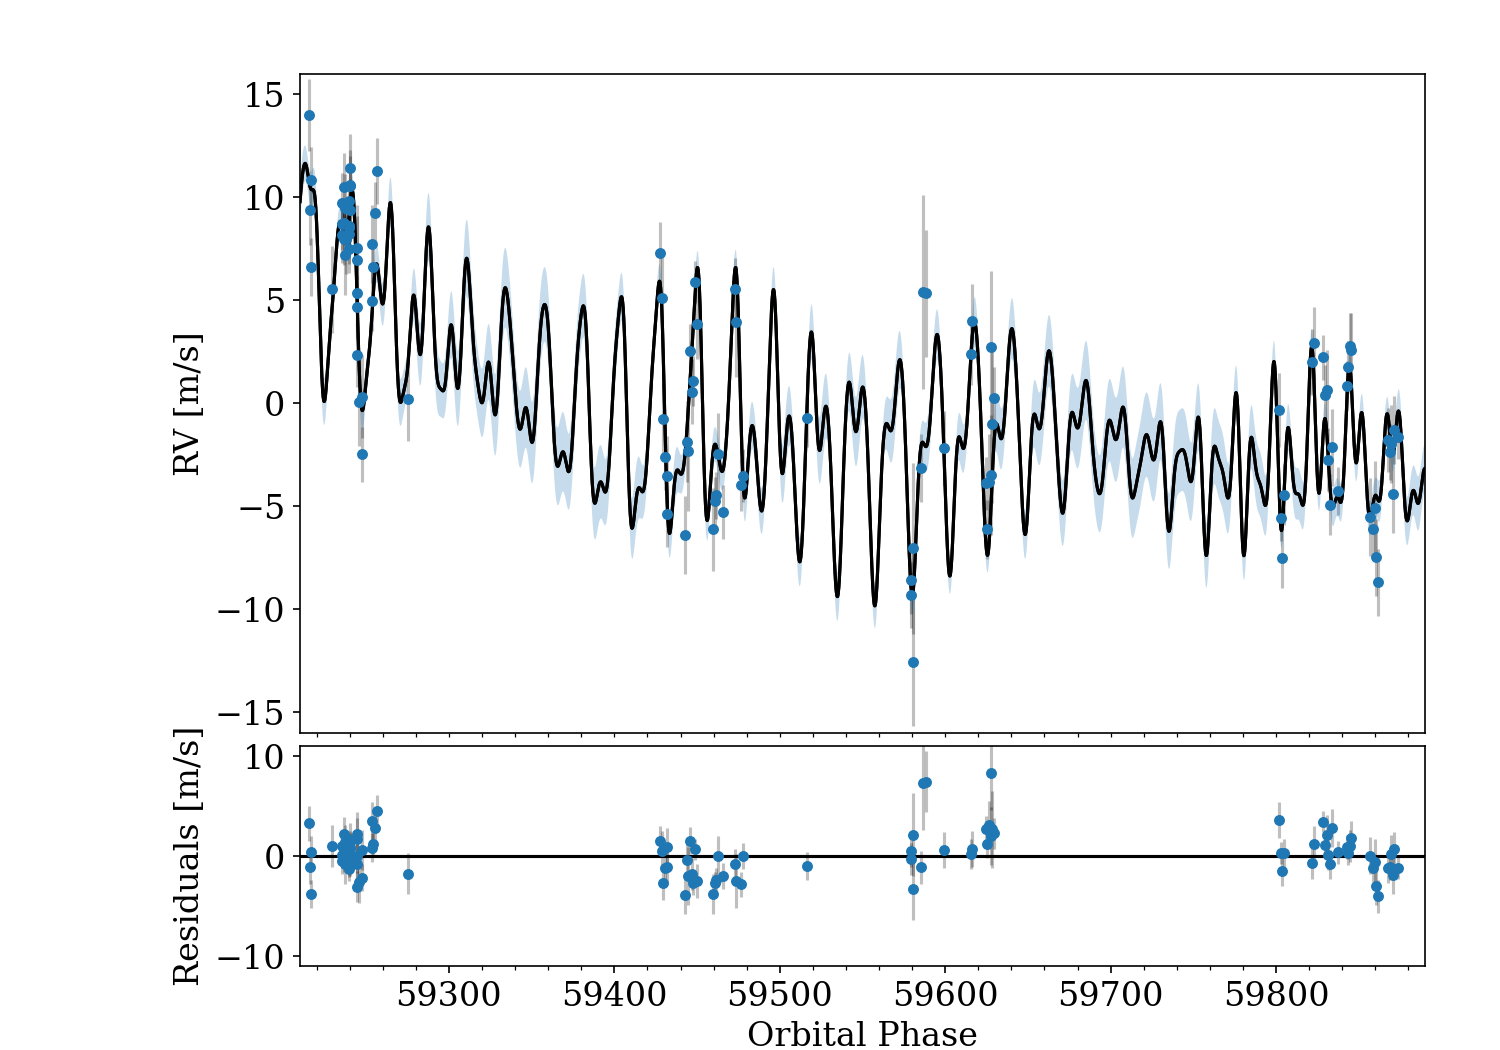

Folded plot for planet  e  saved to: TOI2431_onlyRVs_mod024_GPframework_4p_activity_full.png


In [13]:
# Folder RV plot for each of the planet

font_label = 16
dot_size = 18


figsize = ((10,7))

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams.update({'font.size': font_label})


n_figure = 0
n_color = 0



#RV_full = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RVdata_HARPN_full.dat', skip_header=1)


#sel = (RV_mod_temp[:,9] < 7.8)
#RV_mod = RV_mod_temp[sel,:]

#RV_mod = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RVdata_HARPN_radial_velocities_'+key_name+'.dat', skip_header=1)
#RV_mod_full = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RVdata_HARPN_radial_velocities_'+key_name+'_full.dat', skip_header=1)
try:
    GP_full = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RVdata_gp_quasiperiodic_full.dat', skip_header=1)
    GP_obs = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RVdata_gp_quasiperiodic.dat', skip_header=1)
except:
    GP_full = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RVdata_gp_multidimensional_full.dat', skip_header=1)
    GP_obs = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RVdata_gp_multidimensional.dat', skip_header=1)
    
    
    
fig = plt.figure(figsize=figsize)

ax_0, ax_1 = plots_in_grid()

# Plot of the model
ax_0.plot(GP_full[:,0],GP_full[:,3], color='k', linestyle='-', zorder=2, label='RV model')
ax_0.plot(GP_full[:,0],GP_full[:,3], color='k', linestyle='-', zorder=2)
ax_0.fill_between(GP_full[:,0], GP_full[:,3]-GP_full[:,4], GP_full[:,3]+GP_full[:,4], alpha=0.25)

default_color = 'C0'


ax_0.errorbar(GP_obs[:,0], GP_obs[:,8], yerr=GP_obs[:,9], color='black', markersize=0, alpha=0.25, fmt='o', zorder=0)
ax_0.scatter(GP_obs[:,0], GP_obs[:,8], c=default_color, s=dot_size, zorder=5, alpha=1.0, label=dataset)


# plot of the residuals
ax_1.errorbar(GP_obs[:,0], GP_obs[:,10], yerr=GP_obs[:,11], color='black', markersize=0, alpha=0.25, fmt='o', zorder=1)
ax_1.scatter(GP_obs[:,0], GP_obs[:,10], c=default_color, s=dot_size, zorder=10, alpha=1.0)





ax_1.axhline(0.000, c='k', zorder=3)


ax_0.set_xlim(59210, 59890)
ax_0.set_ylim(-16, 16)

ax_1.set_xlim(59210, 59890)
ax_1.set_ylim(-11, 11)


ax_0.axes.get_xaxis().set_ticks([])

ax_0.set_ylabel('RV [m/s]')
ax_1.set_xlabel('Time [BJD-2400000]')
ax_1.set_ylabel('Residuals [m/s]')

#ax_0.legend()
plot_filename = filename+'_activity_full.png'
print('Folded plot for planet ',key_name,' saved to:', plot_filename )
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')


In [ ]:
plt.close()

